# Autonomous robotics - Artificial Evolution

## Example: The dice game - the most simple example of evoltionary process  

In [1]:
from matplotlib import pyplot as plt
from numpy.linalg import inv
from IPython import display
import numpy as np
import math
import random

In [2]:
def createPlot(fig, x,y,nDices, nGen):
    plt.xlim(0, nGen+1)
    plt.ylim(0, (nDice*6)+1)
    fig.plot(x,y);
    return

In [3]:
nmbDice = 3
popSize = 100
nmbGen = 1000
nmbSelect = 10

def dice(nmbDice):
    s = 0
    for i in range(0,nmbDice):
        s = s + np.random.randint(1,7)
    return s

def getSumPopFitOverGen(evoProc):
    sumPopFit = np.empty(len(evoProc))
    for i in range(len(evoProc)):
        sumPopFit[i] = np.sum(evoProc[:][i])
    return sumPopFit

def getAvgPopFitOverGen(evoProc):
    avgPopFit = np.empty(len(evoProc))
    for i in range(len(evoProc)):
        avgPopFit[i] = float(np.sum(evoProc[:][i])) / float(len(evoProc[0]))
    return avgPopFit

def getMaxPopFitOverGen(evoProc):
    maxPopFit = np.empty(len(evoProc))
    for i in range(len(evoProc)):
        maxPopFit[i] = np.max(evoProc[:][i])
    return maxPopFit

In [4]:
evoProcMonitor = np.empty((nmbGen,popSize))
evoProcMonitor.fill(0)

In [5]:
#init 1st generation
g=0
for i in range(len(evoProcMonitor[g])):
    evoProcMonitor[g,i] = dice(nmbDice)

#evaluate 1st population    
evoProcMonitor[g].sort()

for g in range(0,nmbGen-1):
    #create new population selecting / replacing 
    # the lowest performing individual from population
    for i in range(0,nmbSelect):
        evoProcMonitor[g+1,i] =  dice(nmbDice) # replace
    
    for i in range(nmbSelect,popSize):
        evoProcMonitor[g+1,i] = evoProcMonitor[g,i] # survive

    #evaluate new population 
    evoProcMonitor[g+1].sort()

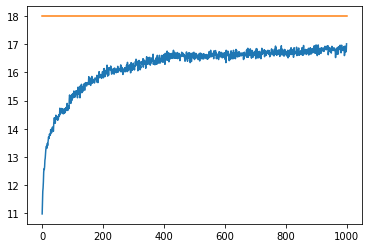

In [6]:
plt.plot(getAvgPopFitOverGen(evoProcMonitor))
plt.plot(getMaxPopFitOverGen(evoProcMonitor))